In [20]:
from __future__ import print_function
import importlib
resources = importlib.import_module("resources")
import resources.MonteCarlo as MC

import numpy as np
import pandas as pd
import random
random.seed(2010)

import matplotlib.pyplot as plt
%matplotlib inline 

import keras
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.constraints import NonNeg
from keras import backend as K

In [21]:
#Import Data
Data = pd.read_csv('data/preprocessed_census_ASC_2010/part-00000-ebe3c7e4-7e5b-4362-886a-88a5842f7d23-c000.csv')
X = Data['tot_population']
Y = Data['position']

In [26]:
batch_size = 128
no_input  = 1
epochs = 10000
lambd  = 1/1000
results = {}
no_output_range = range(3,7)
def customLoss(yTrue,yPred):
    return K.sum(K.min(K.square(K.square(yTrue-yPred)),axis = 1))+lambd*K.sum(K.square(yTrue-yPred))
for no_output in no_output_range:
    model = Sequential()
    model.add(Dense(32, activation='selu',
                    kernel_initializer='random_uniform', bias_initializer='zeros',kernel_constraint=NonNeg(),
                    input_shape=[no_input]))
    model.add(Dense(32, activation='selu',kernel_constraint=NonNeg()))
    model.add(Dense(32, activation='relu',kernel_constraint=NonNeg()))
    model.add(Dense(no_output,kernel_constraint=NonNeg(), activation='linear'))

    model.compile(loss=customLoss,
                  optimizer=keras.optimizers.Nadam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004),
                  metrics=['accuracy'])

    model.fit(X, Y,
              batch_size=batch_size,
              epochs=epochs,
              verbose=0,
              validation_data=(X, Y))
    score = model.evaluate(X, Y, verbose=0)
    print('Test loss:', score[0])

    YPred= model.predict(X)
    maxError = np.max(np.min(np.abs(YPred - Y.as_matrix().reshape(Y.shape[0],1)),axis=1),axis=0)
    results[no_output] = maxError
print(results)

Test loss: 36588325.72413793


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Test loss: 20304928.178683385
Test loss: 5731268.452978057
Test loss: 2576553.1097178683
{3: 60.744842529296875, 4: 57.63587951660156, 5: 39.897216796875, 6: 35.555694580078125}


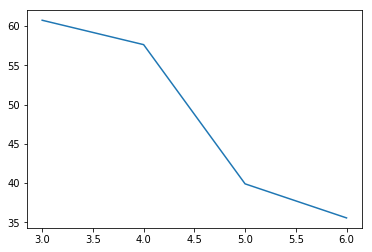

In [27]:
no_output_range = range(1,5)
plt.plot(results.keys(),results.values())

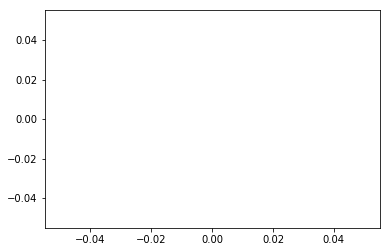

In [3]:
mini = 7.65e9
maxi = 10e9
X1 = X[(mini<X) & (X< maxi)]
Y1 = Y[(mini<X) & (X< maxi)]

plt.plot(X1,Y1,'xk',ms= .05)


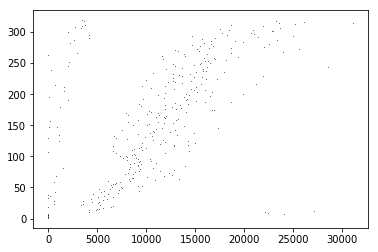

In [24]:
plt.plot(X,Y,'xk',ms= .2)


Text(0.5,1,'Marathon Test')

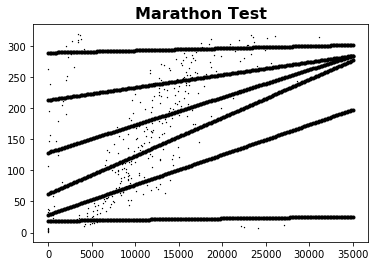

In [28]:
X_space = np.linspace(-1, 35000, 200)
#Y1,Y2 = zip(*model.predict(X))
model_output_linspace = zip(*model.predict(X_space))

plt.scatter(X, Y,s = .2, c='black',marker= '^',zorder=2)
#plt.scatter(x_test, y_test, s = .2 ,c='black',zorder=2)

for Y_pred in model_output_linspace:
    line, =plt.plot(X_space,Y_pred, '.b',linewidth = 3,zorder=1)
    line.set_color("black")
#plt.plot(X,Y3, 'b-',linewidth = 3)
#plt.plot(X,Y4, 'y-',linewidth = 3)

#plt.ylim(0,300)
# Add title and x, y labels
plt.title("Marathon Test", fontsize=16, fontweight='bold')


In [ ]:
X.astype